# 5주차 화소 점처리 예제
### 로고 삽입
### 워터마크 삽입
### QR 코드 삽입

In [16]:
### Packages
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim"

In [9]:
### 영상 읽기
img1 = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\img1.jpg")
img_logo = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\bda_logo.png")

In [10]:
### 영상 삽입 - 좌측상단
img_out = img1.copy()
h, w, c = img_logo.shape
img_out[0:h, 0:w, : ] = img_logo

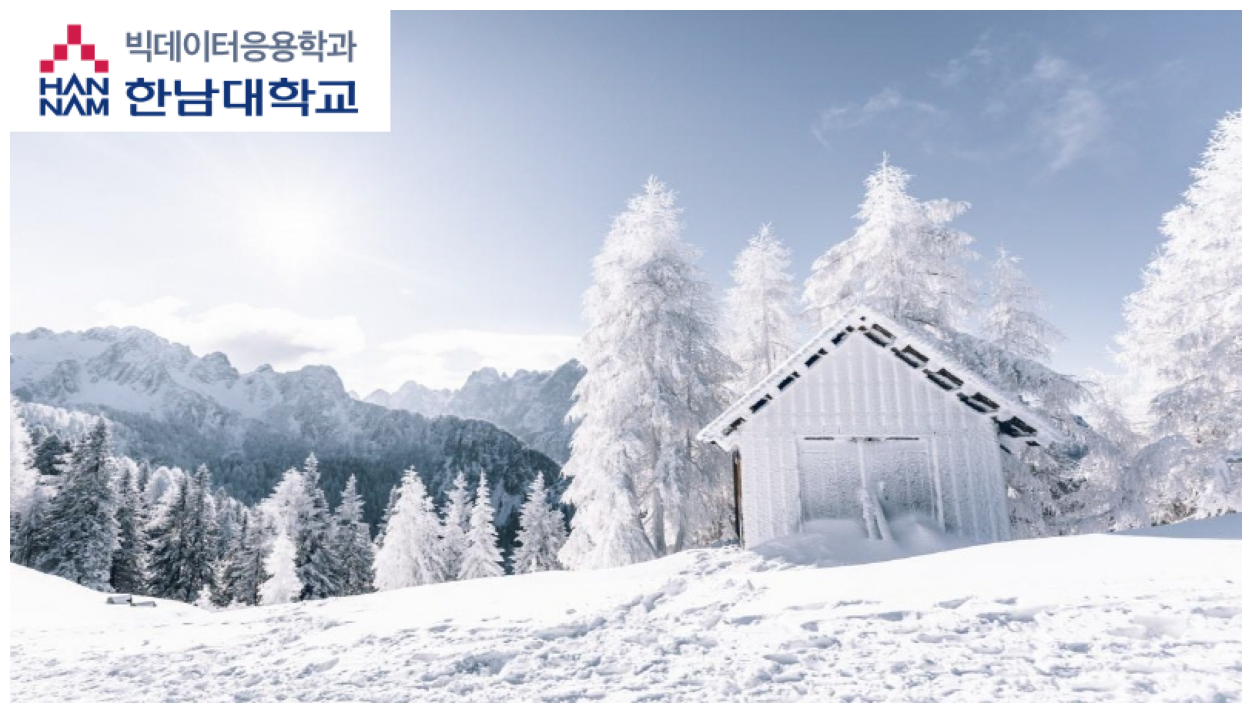

In [11]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

### 워터마크 삽입
워터마크 이미지 생성 후 영상 혼합(image blending)

In [12]:
### 영상 읽기
img1 = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\img1.jpg")
img_logo = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\bda_logo.png")

In [19]:
### 이진화 - grayscale
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)
_, img_logo_th = cv2.threshold(img_logo_gray, 200, 255, cv2.THRESH_BINARY_INV)

In [20]:
### 뺄셈 - 영상의 밝기 감소
img_logo_th_2 = cv2.add(img_logo_th, -240)
img_logo_th_2 = cv2.cvtColor(img_logo_th_2, cv2.COLOR_GRAY2BGR)

In [23]:
### 출력 영상
img_out = img1.copy()

### 대상 영역 추출
h, w, c = img_logo.shape
img_out_sub = img_out[0:h, 0:w, :]

In [24]:
### 덧셈 - 영상의 밝기 증가
img_out_wm = cv2.add(img_out_sub, img_logo_th_2)

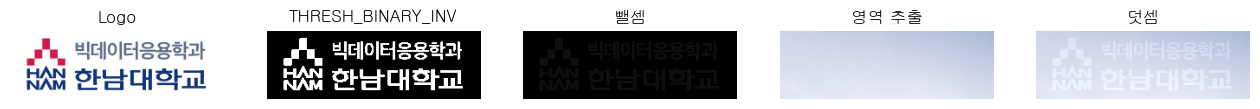

In [25]:
###영상 출력
titles = ['Logo', 'THRESH_BINARY_INV', '뺄셈', '영역 추출', '덧셈']
images = [img_logo, img_logo_th, img_logo_th_2, img_out_sub, img_out_wm]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

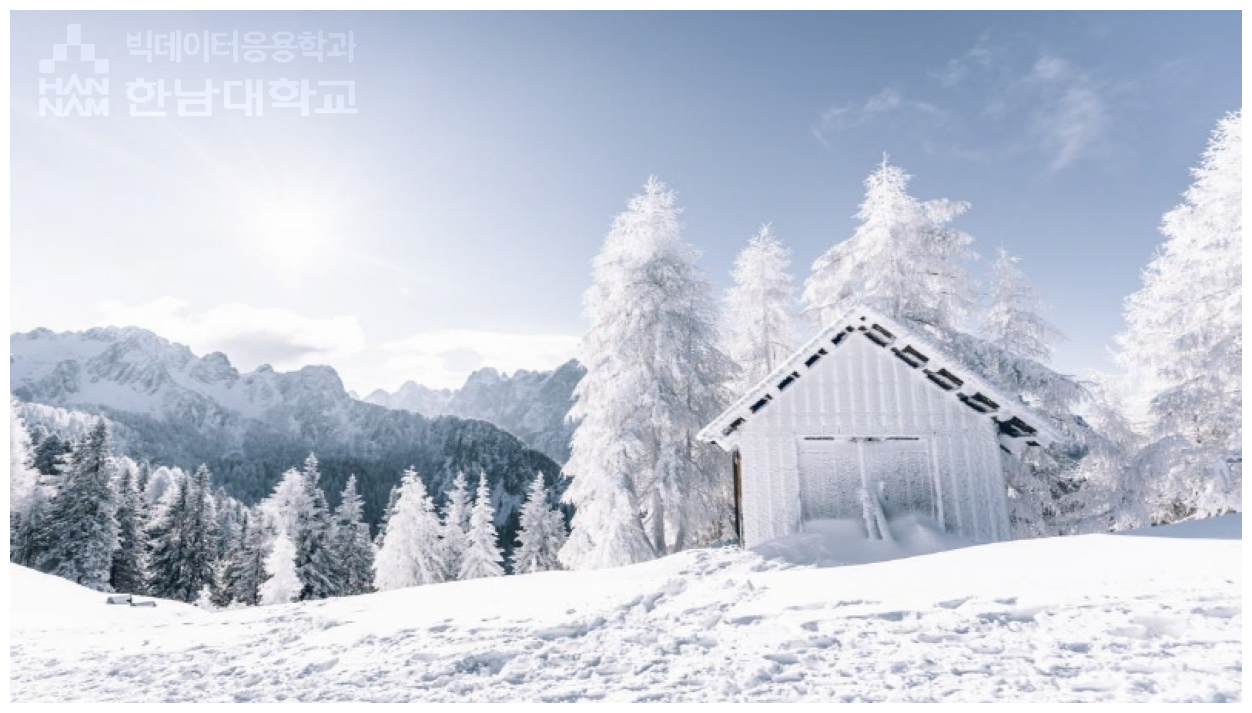

In [27]:
### 영상 삽입 - 좌측 상단
img_out[0:h, 0:w, :] = img_out_wm

### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
### Package 설치
#!pip install qrcode

In [28]:
### Package
import qrcode
import os

In [30]:
### 내용
msg = 'http://bigdata.hannam.ac.kr/'

### QR image 생성
img_QR = qrcode.make(msg)

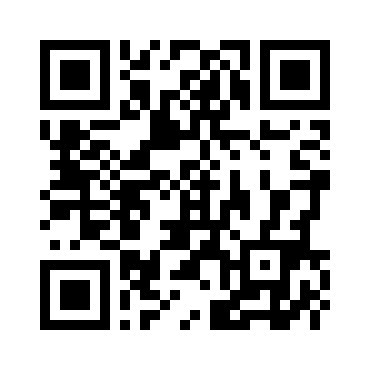

In [31]:
### QR 코드 출력
img_QR

In [32]:
### png 파일로 저장
img_QR.save('QR_BDA.png')

In [33]:
#### Get the current working directory - 파일 저장 위치 확인
os.getcwd()

'g:\\내 드라이브\\2023\\Image Process'

In [34]:
### QR코드 삽입
img1 = cv2.imread(r"C:\Users\kr937\Desktop\2023\2023\Image processing\img1.jpg")
img_qr_code = cv2.imread('QR_BDA.png')

In [36]:
img1.shape

(450, 800, 3)

In [37]:
img_qr_code.shape

(370, 370, 3)

In [41]:
### 크기 조정
img_qr_code_resize = cv2.resize(img_qr_code,
                                dsize=(0, 0),
                                fx=0.2, fy=0.2,
                                interpolation=cv2.INTER_AREA)

In [42]:
### 영상 삽입 - 좌측 상단
img_out = img1.copy()
h, w, c = img_qr_code_resize.shape
img_out[10:h+10, 10:w+10, : ] = img_qr_code_resize

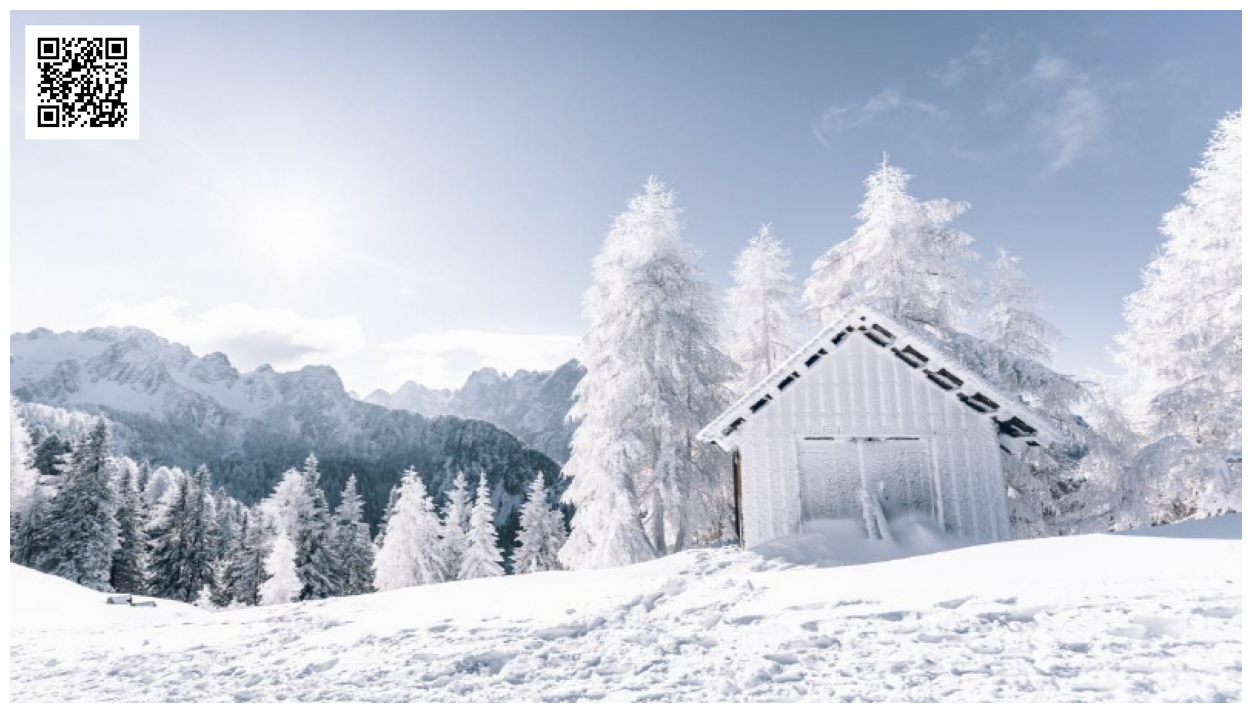

In [43]:
### 영상 출력
img_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [44]:
### 영상 저장
out_file = r'C:\Users\kr937\Desktop\2023\2023\Image processing\img1_qr.png'
cv2.imwrite(out_file, img_out)

True